In [1]:
#TAKEN FROM: https://ee227c.github.io/code/lecture4.html#madness
%matplotlib inline
import os, struct
from array import array
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(1337)

kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}
matplotlib.rc('font', **font)

def error_plot(ys, yscale='log'):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale(yscale)
    plt.plot(range(len(ys)), ys, **kwargs)

In [2]:
#FROM: https://gist.github.com/tylerneylon/ce60e8a06e7506ac45788443f7269e40
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
mnist_labels = read_idx('train-labels.idx1-ubyte')
mnist_imgs = read_idx('train-images.idx3-ubyte')

C:\Users\jz124\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [4]:
def plot_mnist_vector(m):
    plt.figure()
    plt.imshow(m.reshape((28, 28)))
    plt.show()

In [ ]:
plot_mnist_vector(np.reshape(mnist_imgs[56000], (784,1)))

In [5]:
def grad(x):
    x = np.reshape(x, (784,1))
    return np.dot(x,(np.dot(x.T,U)))

In [6]:
def proj(x):
    q, r = np.linalg.qr(x)
    return q

In [85]:
def gradient_descent(x, prev, eta):
    return proj(prev + eta * grad(x))

In [9]:
def predict(inp, mat):
    return np.linalg.norm(inp.T - np.dot(np.dot(mat, mat.T),inp.T), ord = 2)

In [145]:
k = 10
U = np.linalg.qr(np.random.uniform(0, 1, (784, k)))[0]

In [151]:
num_samples = 1000
num_epochs = 10
test = mnist_imgs / 255
data = np.asarray(test, dtype=np.float64)
data = data.reshape((data.shape[0], -1), order='F')
data = np.random.permutation(data)
test = data[0:num_samples]
a = []
print('Initial Error ' ,predict(test, U))
U_t = U
for i in range(0, num_epochs):
    for j in range(0, num_samples):
        num = np.random.randint(0, num_samples-1)
        U = gradient_descent(data[num], U_t, 0.01)
        #print('Norm diff ', np.linalg.norm(U - U_t, ord = 'fro'))
        #print(np.linalg.norm(U, ord = 'fro'))
        U_t = U
        #a.append(predict(data[num], U))
    print('Error',i,'epoch',predict(test, U))
    #print(U)
    

Initial Error  76.08165612534776
Error 0 epoch 63.27574815521211
Error 1 epoch 59.31544938111419
Error 2 epoch 67.53175308288266
Error 3 epoch 60.85406228239109
Error 4 epoch 53.46252659484307
Error 5 epoch 70.23709978390087
Error 6 epoch 59.258028148471276
Error 7 epoch 68.2039244646156
Error 8 epoch 73.68418042362767
Error 9 epoch 58.84471876770578


sum = 0
for i in range(0, 100):
    num = np.random.randint(0, num_samples - 1)
    sum += predict(data[num], U)
print(sum/num_samples)

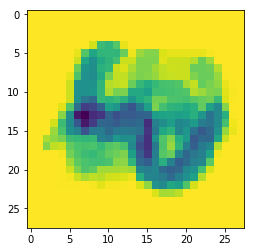

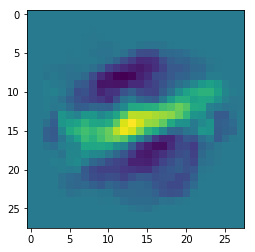

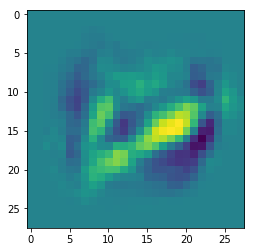

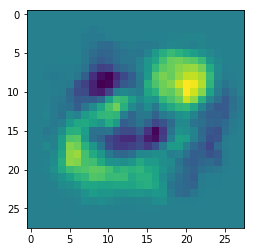

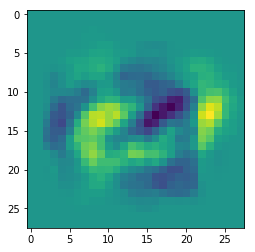

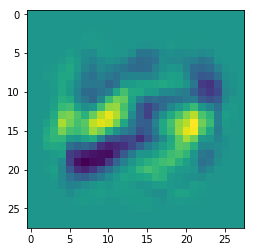

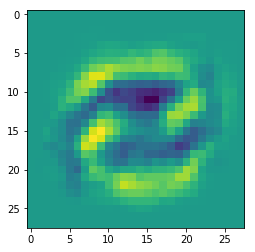

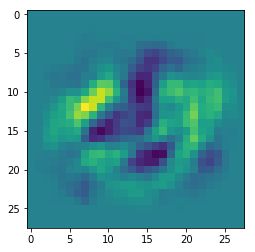

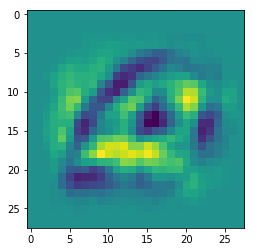

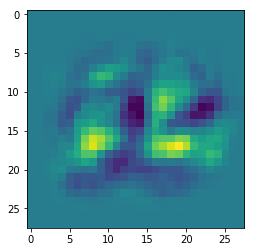

In [148]:
for i in range(k):
    plot_mnist_vector(U.T[i])

162.5386531231558


C:\Users\jz124\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


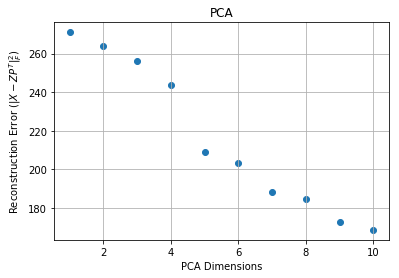

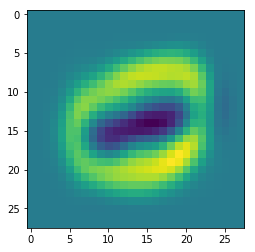

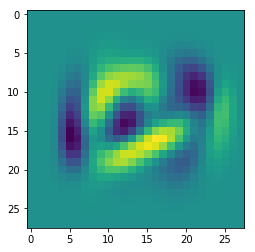

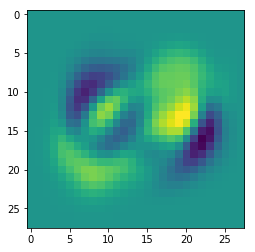

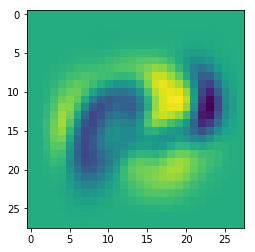

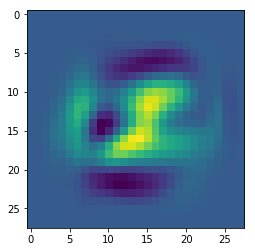

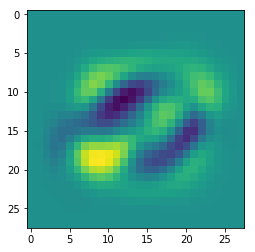

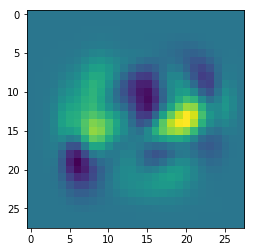

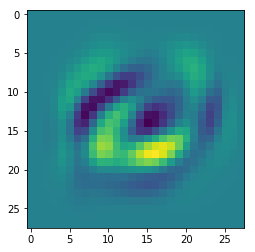

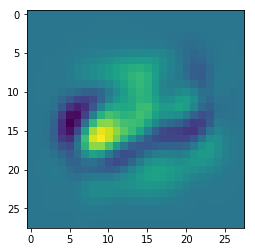

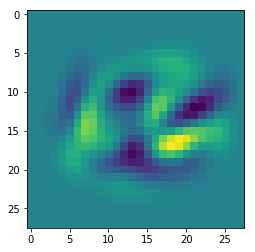

In [150]:
from sklearn.decomposition import pca
# data
dimensions = k
X = test
# PCA


# Reconstructions Error
err = np.zeros(dimensions)
r = pca.PCA(n_components=dimensions)
r.fit(data)
X_train_pca = r.transform(X)

for i in range(dimensions):
    comp = r.components_[0:i+1]
    err[i] = np.linalg.norm(X.T - (np.dot(comp.T, np.dot(comp, X.T))))
    
X_projected = r.inverse_transform(X_train_pca)
print(np.linalg.norm(X - X_projected))
plt.figure()
plt.scatter(np.arange(1, dimensions+1), err)
plt.xlabel('PCA Dimensions')
plt.ylabel('Reconstruction Error ($\|X - Z P^T \|_F^2$)')
plt.title('PCA')
plt.grid('on')
plt.show()

for i in range(dimensions):
    plot_mnist_vector(r.components_[i])